In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import gym
import numpy as np
import model
import man_controller
import matplotlib.pyplot as plt
from utils import *

In [3]:
tf.config.gpu.set_per_process_memory_growth(True)

In [4]:
env = gym.make("FetchPickAndPlace-v1")

/home/norman/anaconda3/envs/mjc/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [5]:
env.reset()
state_start = env.reset()["observation"]
new_state, *_ = env.step([0.,1.,0.,0.])
diff = new_state["observation"] - state_start
diff

array([-2.24046771e-04,  2.93795191e-02, -8.62818747e-05, -1.39953649e-09,
       -9.09698872e-10,  3.39571997e-05,  2.24045371e-04, -2.93795200e-02,
        1.20239074e-04,  9.52260746e-05,  9.13137616e-04,  3.64299108e-08,
       -5.60460166e-08, -3.92641338e-15,  1.58019856e-04, -2.60142353e-02,
        5.74637831e-05, -2.18584081e-08,  3.36283201e-08,  3.85311002e-19,
       -1.58019018e-04,  2.60142358e-02, -7.76259903e-05,  4.36806888e-04,
        4.37577116e-04])

In [6]:
env.env.render(mode = "rgb_array")

Creating window glfw


array([[[115, 219, 145],
        [115, 219, 145],
        [115, 219, 145],
        ...,
        [115, 219, 145],
        [115, 219, 145],
        [115, 219, 145]],

       [[115, 219, 145],
        [115, 219, 145],
        [115, 219, 145],
        ...,
        [115, 219, 145],
        [115, 219, 145],
        [115, 219, 145]],

       [[115, 219, 145],
        [115, 219, 145],
        [115, 219, 145],
        ...,
        [115, 219, 145],
        [115, 219, 145],
        [115, 219, 145]],

       ...,

       [[115, 220, 146],
        [115, 220, 146],
        [115, 220, 146],
        ...,
        [116, 220, 146],
        [116, 220, 146],
        [116, 220, 146]],

       [[115, 220, 146],
        [115, 220, 146],
        [115, 220, 146],
        ...,
        [116, 220, 146],
        [116, 220, 146],
        [116, 220, 146]],

       [[115, 220, 146],
        [115, 220, 146],
        [115, 220, 146],
        ...,
        [116, 220, 146],
        [116, 220, 146],
        [116, 220, 146]]

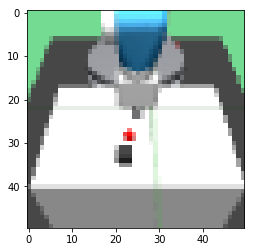

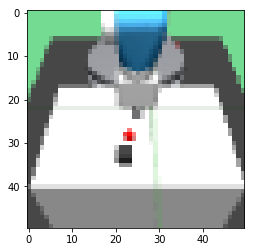

In [7]:
#CHIAMALO DUE VOLTE E ALLA SECONDA FUNZIONA???????
env.reset()
env.render()
plt.imshow(env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:])
plt.show()
plt.imshow(env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:])
plt.show()

In [8]:
env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]

array([[[115, 220, 146],
        [115, 220, 146],
        [115, 220, 146],
        ...,
        [115, 220, 146],
        [115, 220, 146],
        [115, 220, 146]],

       [[115, 220, 146],
        [115, 220, 146],
        [115, 220, 146],
        ...,
        [115, 220, 146],
        [115, 220, 146],
        [115, 220, 146]],

       [[115, 220, 146],
        [115, 220, 146],
        [115, 220, 146],
        ...,
        [115, 220, 146],
        [115, 220, 146],
        [115, 220, 146]],

       ...,

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]]

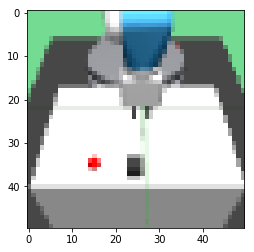

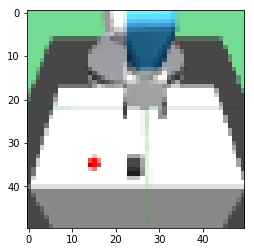

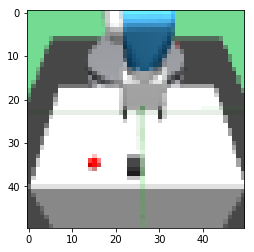

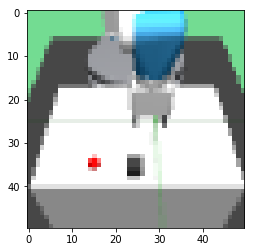

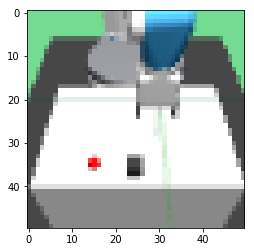

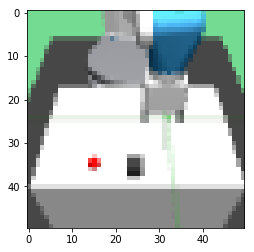

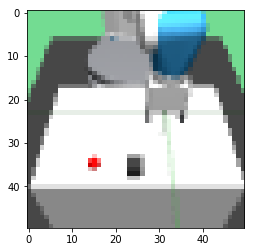

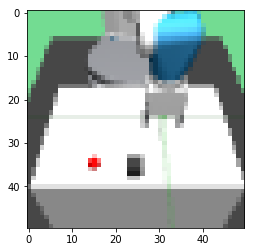

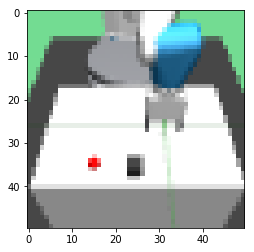

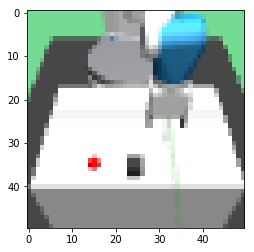

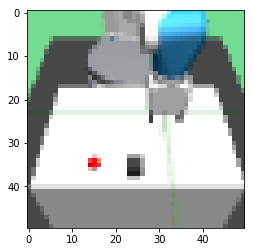

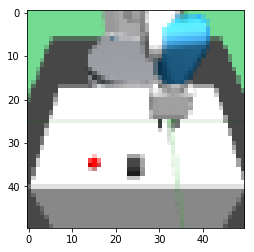

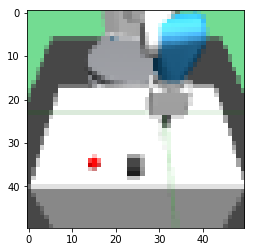

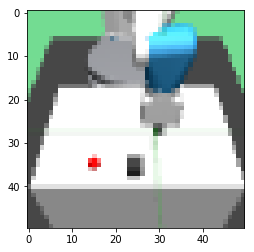

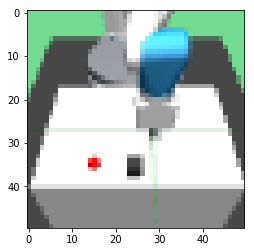

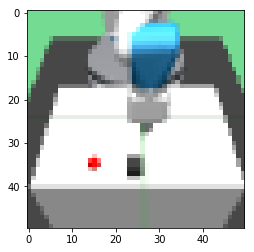

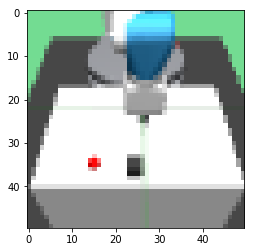

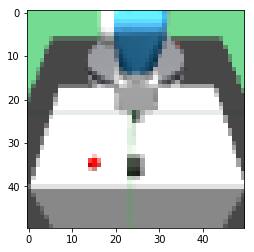

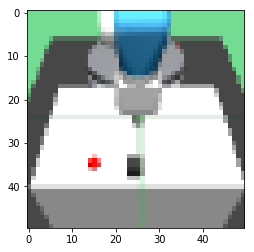

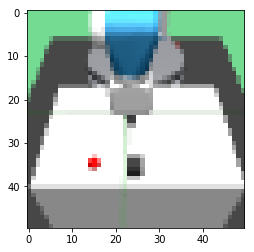

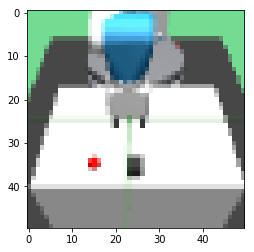

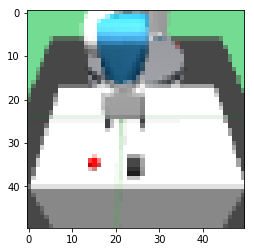

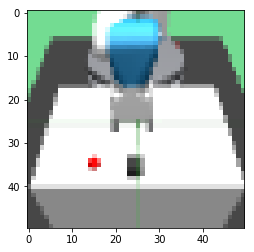

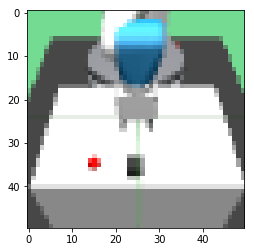

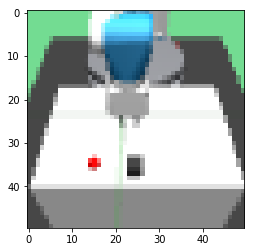

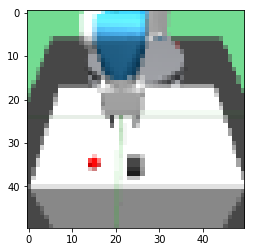

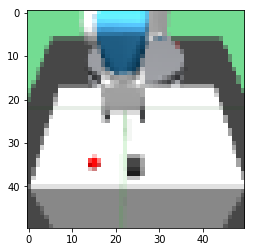

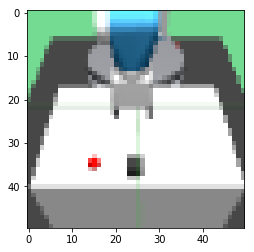

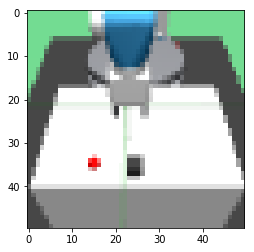

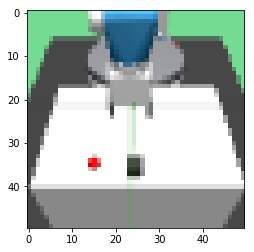

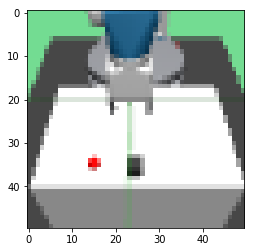

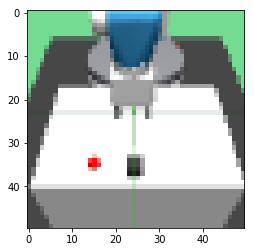

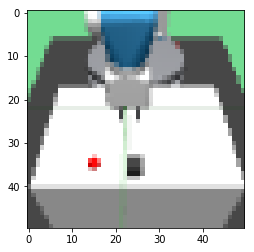

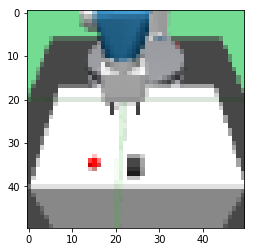

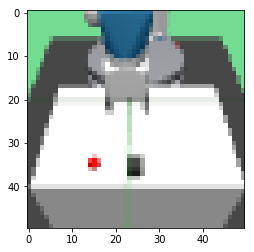

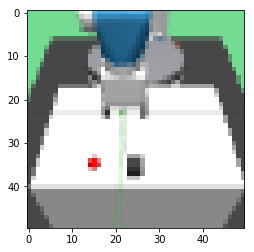

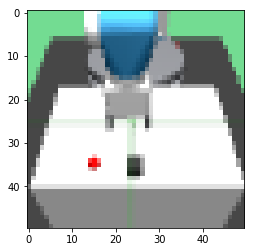

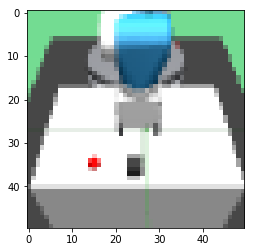

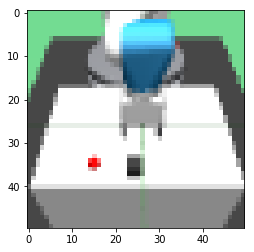

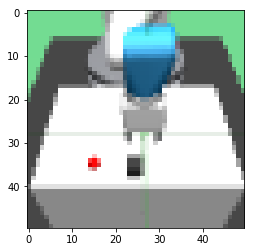

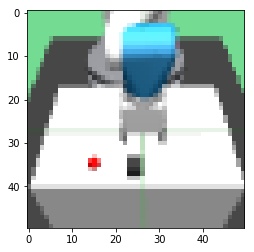

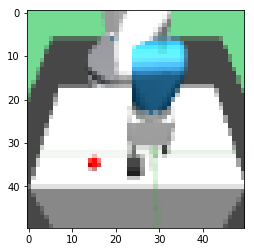

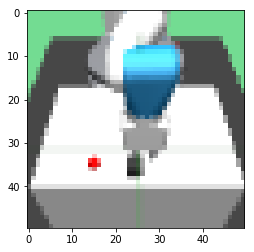

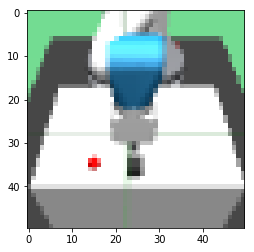

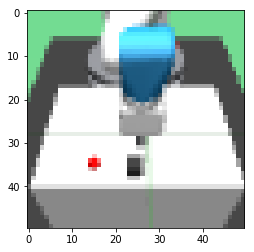

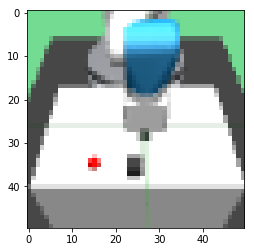

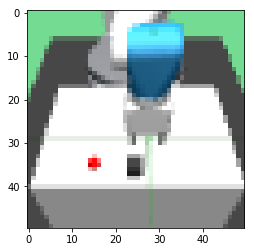

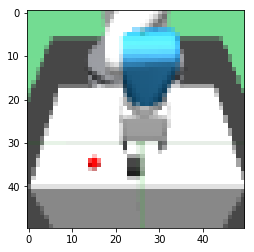

KeyboardInterrupt: 

In [9]:
obs = []
acts = []
for i in range(50):
    act = env.action_space.sample()
    env.step(act)
    x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
    plt.imshow(x)
    plt.show()
    obs.append(x.astype(np.float64))
    acts.append(act)

In [10]:
c = model.ConvBCModel(50, 4,  3, [5,5,3], [32, 64, 128], 0.01)

In [13]:
c(np.random.randn(1,50,50,3))

<tf.Tensor: id=161, shape=(1, 4), dtype=float64, numpy=array([[ 0.35385655, -0.19569419, -0.08248464, -0.03831115]])>

In [12]:
c.train(np.array(obs), acts, 1, 10)

NameError: name 'c' is not defined

In [13]:
len(a)

NameError: name 'a' is not defined

In [14]:
from utils import *

In [15]:
state = env.reset()
state, goal = save_state(env)
env = set_state(env, state, goal)

In [16]:
env.env.sim.render()

TypeError: an integer is required

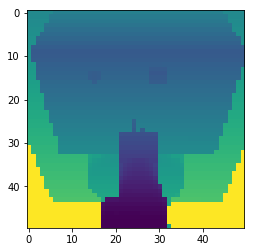

MjSimState(time=0.4000000000000003, qpos=array([ 4.04999930e-01,  4.80000000e-01,  9.94402773e-08, -8.64969037e-06,
        1.81229827e-10,  6.00288106e-02,  9.95933222e-03, -8.28179489e-01,
       -3.60536711e-03,  1.44395047e+00,  2.98934300e-03,  9.55073323e-01,
        5.57696738e-03,  2.55108763e-06, -8.67902630e-08,  1.48080741e+00,
        8.10870407e-01,  4.24702091e-01,  1.00000000e+00, -4.41224843e-08,
        6.78807450e-08, -9.52242599e-16]), qvel=array([-2.54237879e-10, -2.25960720e-12,  6.96075052e-08, -2.06169028e-05,
       -3.28449304e-14,  7.22090908e-05,  7.02329211e-04,  1.68500947e-04,
       -1.36245845e-03, -3.86958851e-04,  1.12920681e-03,  2.16279647e-04,
       -9.51429180e-04,  1.29051726e-05,  4.90429596e-06, -4.83773193e-08,
       -3.14452576e-08,  1.17069414e-03,  1.25976791e-06, -1.93810448e-06,
       -2.89084431e-18]), act=None, udd_state={})

In [17]:
env.reset()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x)
plt.show()
env.env.sim.get_state()

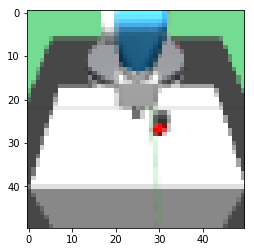

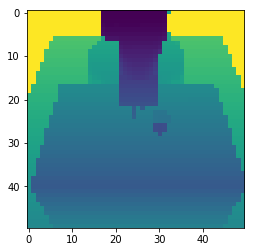

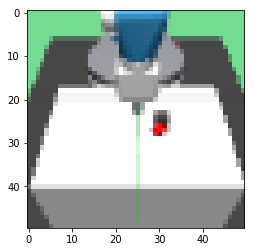

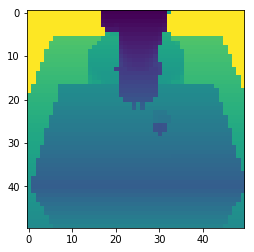

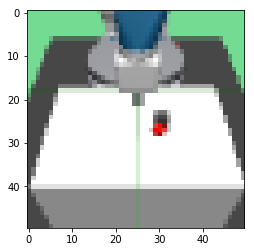

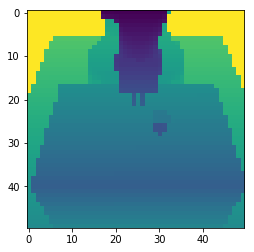

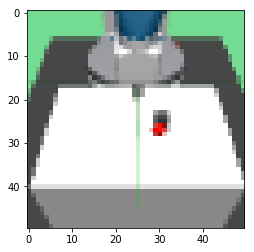

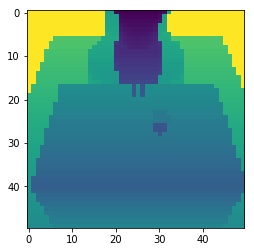

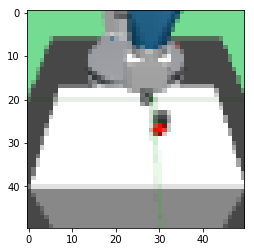

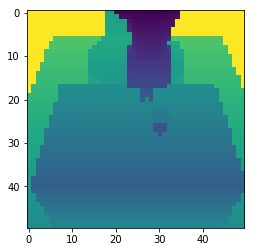

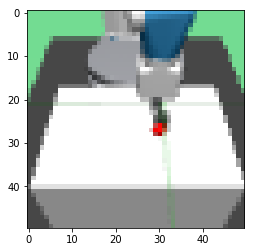

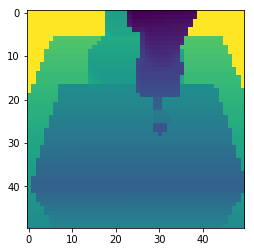

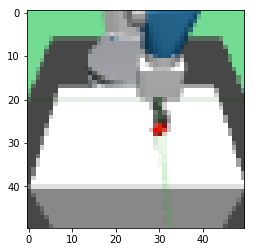

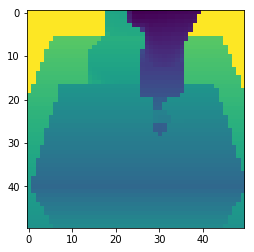

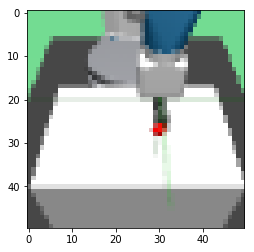

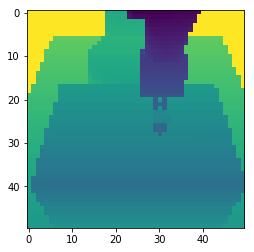

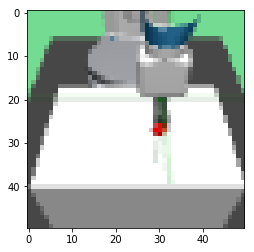

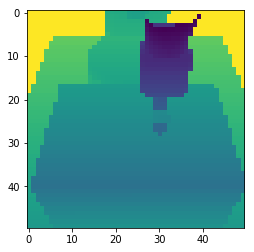

({'observation': array([ 1.45369087e+00,  8.12376123e-01,  6.90894465e-01,  1.27667549e+00,
          8.41132738e-01,  4.24783922e-01, -1.77015385e-01,  2.87566156e-02,
         -2.66110542e-01,  2.31577322e-03,  3.30945536e-05, -6.17069924e-10,
          9.49338351e-10, -1.90589207e-15, -1.88151094e-02,  3.80507137e-04,
         -2.15300899e-02,  3.36308869e-10, -5.17398259e-10, -1.59297665e-18,
          1.88151093e-02, -3.80507145e-04,  2.15304004e-02,  1.03053776e-04,
         -6.95657734e-05]),
  'achieved_goal': array([1.27667549, 0.84113274, 0.42478392]),
  'desired_goal': array([1.22089855, 0.78847225, 0.42469975])},
 -1.0,
 False,
 {'is_success': 0.0})

In [258]:
env.reset()
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([0.,0.,1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([0.,0.,1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([0.,0.,1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([0.,1.,-1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([0.,1.,-1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([1.,0.,1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([1.,0.,1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([1.,0.,1.,0.])
x = env.env.sim.render(50, 50, camera_name = 'external_camera_0')[::-1,:,:]
plt.imshow(x)
plt.show()
a, x = env.env.sim.render(50, 50, depth = True, camera_name = 'external_camera_0')
plt.imshow(x[::-1,:])
plt.show()
env.step([1.,0.,1.,0.])

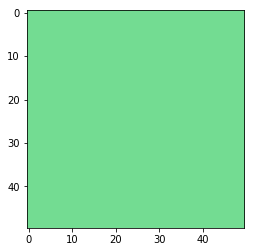

In [257]:
env.reset()
env.render(mode = "rgb_array")
plt.imshow(env.env.viewer.sim.render(50, 50, camera_name = 'head_camera_rgb')[::-1,:,:])


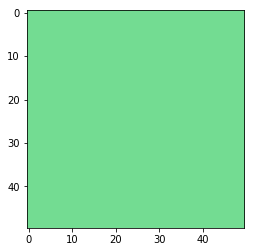

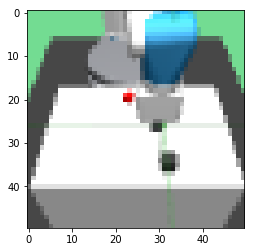

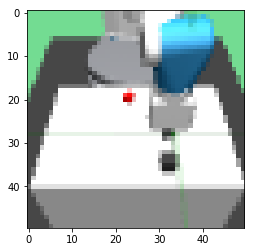

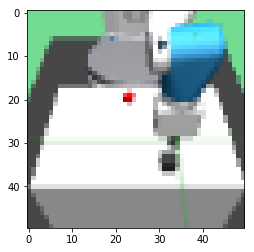

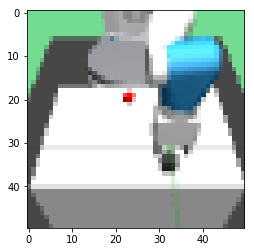

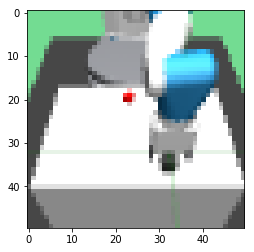

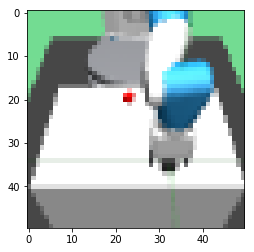

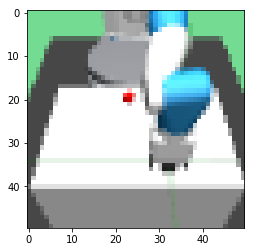

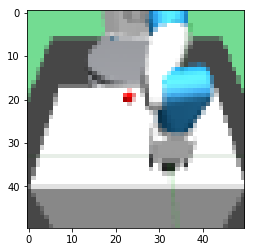

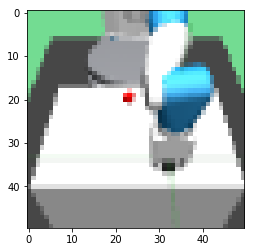

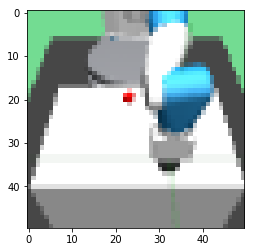

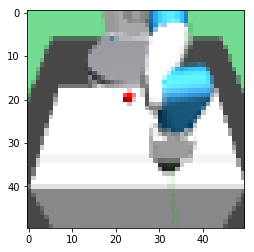

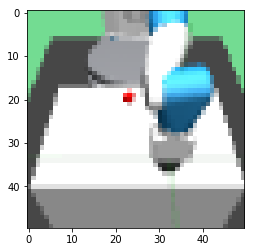

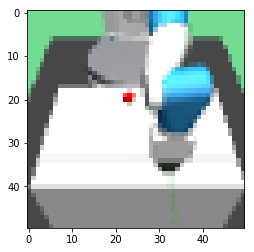

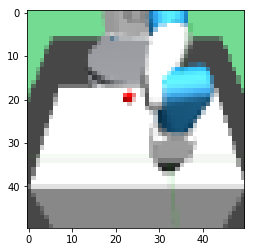

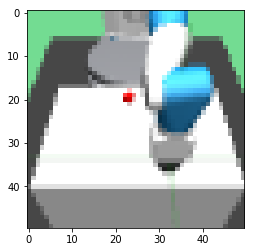

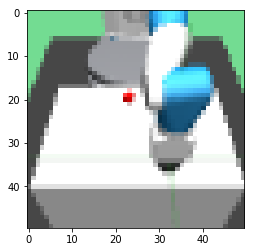

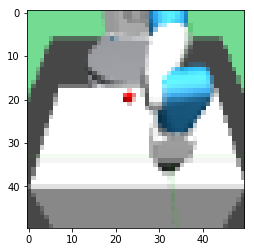

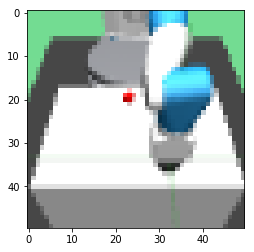

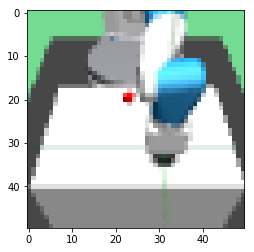

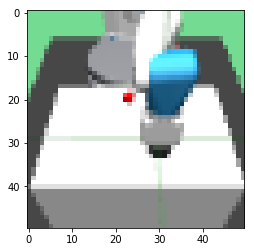

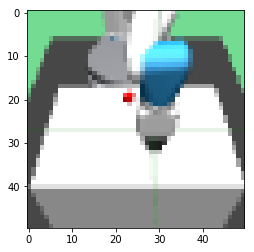

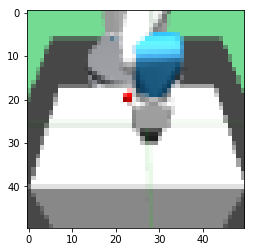

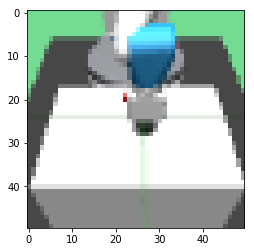

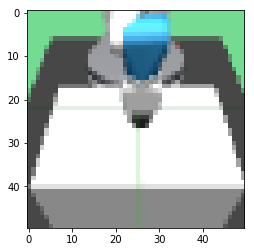

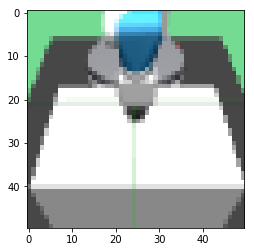

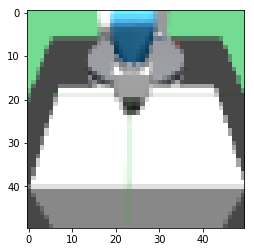

In [370]:
state = env.reset()
#env.render(mode = "rgb_array")
a, b = man_controller.get_demo_cam(env, state, norm = True, render = False)
for x in a:
    plt.imshow(x)
    plt.show()

In [9]:
import utils

In [10]:
def get_experience(eps, env):
    imstates, states, actions, goals = [], [], [], []
    for ep in range(eps):
        state = env.reset()
        s, g = save_state(env)
        new_states, new_acts = man_controller.get_demo_cam(env, state, norm = True, depth = True)
        imstates+=new_states
        actions+=new_acts
        states+=s
        goals+=list(g)
        
    return imstates, states, actions, goals

In [11]:
env.reset()
ims, s, a, g = [], [], [], []

In [12]:
imss, ss, aa, gg = get_experience(200, env)
ims+=imss
a+=aa
s+=ss
g+=gg

ims_uns, s_uns, a_uns, g_uns = [], [], [], []
imss, ss, aa, gg = get_experience(200, env)
ims_uns+=ss
s_uns+=ss
a_uns+=aa
g_uns+=gg

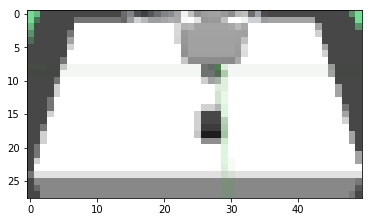

In [29]:
plt.imshow(ims[0][:,:,:3][16:44,:,:])

In [242]:
a

[array([-3.03490241,  2.62576203,  0.005     ,  0.        ]),
 array([-2.69751319,  2.21051557,  0.005     ,  0.        ]),
 array([-1.97989811,  1.41729032,  0.005     ,  0.        ]),
 array([-0.78413933,  0.17967369,  0.005     ,  0.        ]),
 array([ 0.20018341, -0.09718022, -2.61617165,  1.        ]),
 array([ 0.14767348, -0.03594562, -2.23594909,  1.        ]),
 array([ 0.01162068,  0.00650412, -1.62468126,  1.        ]),
 array([-0.00228278,  0.00622637, -0.68405489,  1.        ]),
 array([ 0.00604166, -0.00196061,  0.32291237,  1.        ]),
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 [0.0, 0.0, 0.0, -1.0],
 array([ 7.21551309e-01, -6.92360729e-01,  5.74155349e-04, -1.00000000e+00]),
 array([ 0.72102195, -0.69290231, -0.00370639, -1.        ]),
 array([ 0.72074016, -0.69319775, -0.00324081, -1.        ]),


In [15]:
import sys
sys.getsizeof(s)

45056

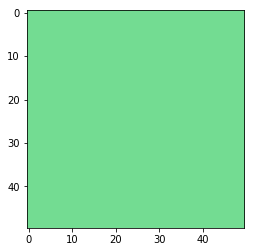

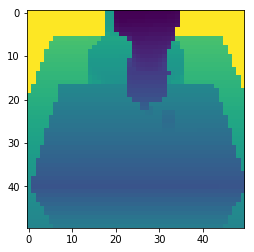

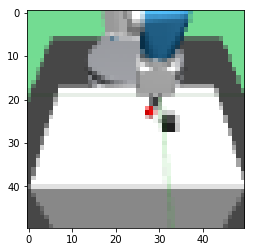

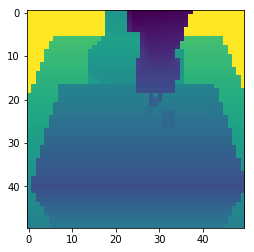

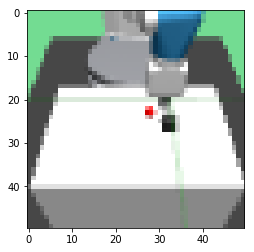

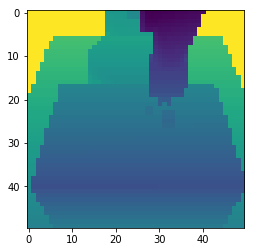

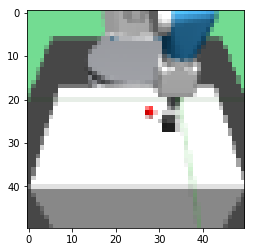

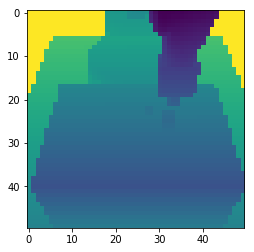

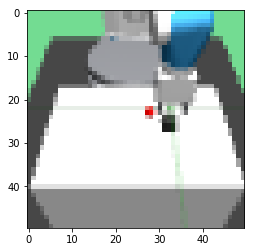

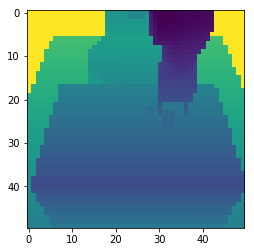

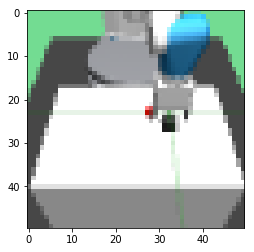

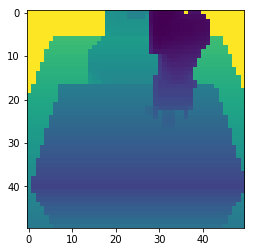

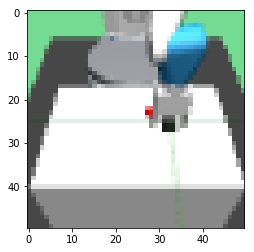

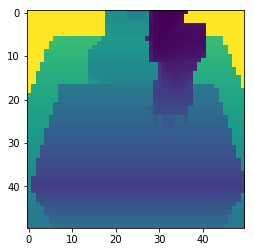

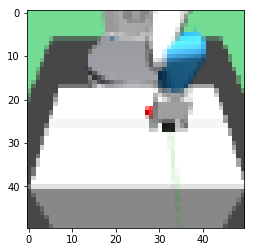

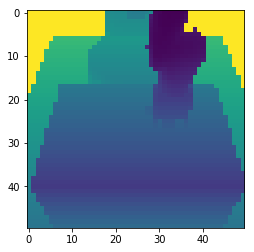

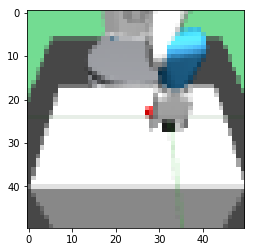

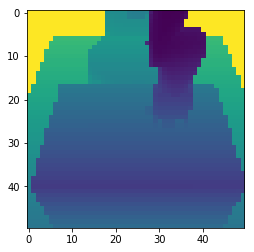

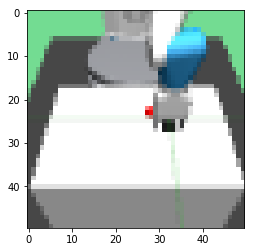

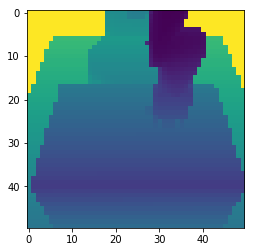

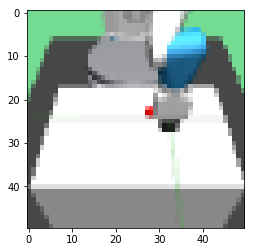

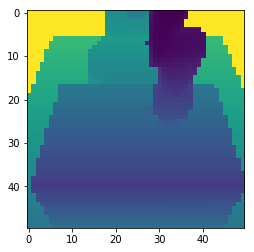

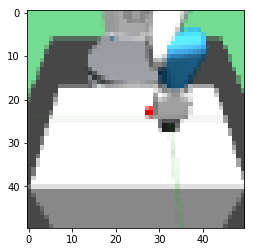

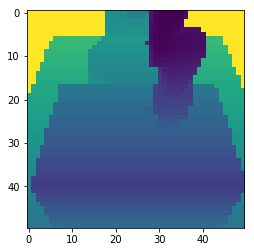

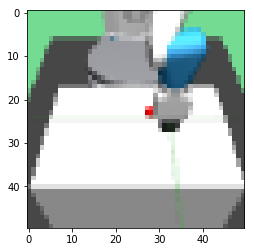

KeyboardInterrupt: 

In [16]:
for _ in s:
    plt.imshow(_[:,:,:3])
    plt.show()
    plt.imshow(_[:,:,3])
    plt.show()

In [22]:
c = model.ConvBCModel(50, 4, 4, [5,5,3,3], [32,32, 64, 128], 0.001)

In [23]:
c(s[0][None,:,:,:])
c.summary()

TypeError: 'float' object is not subscriptable

In [24]:
c.train(np.array(s), np.array(a), 64, 100, print_loss = True, )

ValueError: Failed to convert numpy ndarray to a Tensor (Unable to get element as bytes.).

In [36]:
c(np.array(s)[0][None,:]), a[0]

(<tf.Tensor: id=745696, shape=(1, 4), dtype=float64, numpy=array([[-1.1823608 ,  0.97179958, -0.0272622 , -0.38490599]])>,
 array([-2.34811701,  2.48000139,  0.005     ,  0.        ]))

In [25]:
class ConvAE(tf.keras.Model):
    def __init__(self, im_size, n_channels, hid_layers, k_sizes, filters, lr = 0.001, set_seed = None):
        if set_seed:
            tf.random.set_seed(set_seed)
            self.set_seed = set_seed
        else:
            self.set_seed = None
        super(ConvAE, self).__init__()
        self._enlayers = []
        for _ in range(hid_layers):
            self._enlayers.append(tf.keras.layers.Conv2D(kernel_size = k_sizes[_], filters = filters[_],
                                                        activation = "relu", strides = 2, padding = "same"))
        self._delayers = []
        for _ in reversed(range(hid_layers)):
            self._delayers.append(tf.keras.layers.Conv2D(kernel_size = k_sizes[_], filters = filters[_],
                                                        activation = "relu", strides = 1, padding = "same"))
        self._delayers.append(tf.keras.layers.Conv2D(kernel_size = 3, filters = n_channels, activation = "relu", 
                                                    strides = 1, padding = "same"))
        self.opt = tf.keras.optimizers.Adam(learning_rate = lr)
        
    def call(self, x):
        for l in self._enlayers:
            x = l(x)
        for i, l in enumerate(self._delayers):
            x = l(x)
            x = tf.keras.layers.UpSampling2D()(x) if i != len(self._delayers) - 1 else x
        pad = x.shape[1] - 50
        return x[:,pad//2:x.shape[1] - pad//2, pad//2:x.shape[1]-pad//2,:]
    
    def _loss(self, x, y):
        return tf.reduce_mean(tf.losses.mean_absolute_error(y, x)) #.mean_squared_error(y, x)
    
    def _create_ds(self, x, batch_size, epochs):
    #    self.xm = x.mean()
    #    self.xstd = x.std()
    #    x = (x-self.xm)/self.xstd
        ds = tf.data.Dataset.from_tensor_slices(x)
        ds = ds.shuffle(x.shape[0])
        ds = ds.repeat(epochs)
        ds = ds.batch(batch_size)
        return ds
    
    def train(self, x, batch_size, epochs, print_loss = False, verbose = False):
        if self.set_seed:
            tf.random.set_seed(self.set_seed)
        ds = self._create_ds(x, batch_size, epochs)    
        for i,el in enumerate(ds):
            if verbose: 
                if i%1000==0: print("Element ", i)
            with tf.GradientTape() as tape:
                x = el
                y_pred = self.call(x)
                loss = self._loss(y_pred, x)
            grads = tape.gradient(loss, self.variables)
            self.opt.apply_gradients(zip(grads, self.variables))
            if print_loss: print(loss)

In [26]:
a = ConvAE(50, 4, 3, [5,3,3], [32, 64, 256])

In [27]:
a(np.random.randn(1,50,50,4))

<tf.Tensor: id=395, shape=(1, 50, 50, 4), dtype=float64, numpy=
array([[[[0.02291462, 0.        , 0.        , 0.01681354],
         [0.02690305, 0.        , 0.00600819, 0.01180881],
         [0.04641354, 0.        , 0.01337586, 0.00447026],
         ...,
         [0.00506845, 0.        , 0.        , 0.02586536],
         [0.0018209 , 0.        , 0.01055327, 0.01942289],
         [0.        , 0.        , 0.01043117, 0.01663808]],

        [[0.0184062 , 0.        , 0.0026799 , 0.0174267 ],
         [0.02749074, 0.        , 0.0210981 , 0.01159077],
         [0.03942229, 0.        , 0.02884314, 0.        ],
         ...,
         [0.        , 0.        , 0.01107109, 0.02904079],
         [0.        , 0.        , 0.02373995, 0.01778548],
         [0.        , 0.        , 0.01630605, 0.01859691]],

        [[0.01589437, 0.        , 0.00030176, 0.01796939],
         [0.0209455 , 0.        , 0.01869887, 0.01864543],
         [0.02527563, 0.        , 0.02675683, 0.01725757],
         ...,
     

In [28]:
a.summary()

Model: "conv_ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            multiple                  3232      
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                  18496     
_________________________________________________________________
conv2d_9 (Conv2D)            multiple                  147712    
_________________________________________________________________
conv2d_10 (Conv2D)           multiple                  590080    
_________________________________________________________________
conv2d_11 (Conv2D)           multiple                  147520    
_________________________________________________________________
conv2d_12 (Conv2D)           multiple                  51232     
_________________________________________________________________
conv2d_13 (Conv2D)           multiple                  1156

In [33]:
s = np.array(ims)

In [40]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [48]:
#with tf.device('/device:CPU:0'):
a.train(s, 64, 1, print_loss=True)

ResourceExhaustedError: OOM when allocating tensor with shape[60,32,56,56] and type double on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D]

<tf.Tensor: id=2383790, shape=(1, 50, 50, 4), dtype=float64, numpy=
array([[[[0.45696743, 0.89122665, 0.59555389, 1.01973234],
         [0.46220934, 0.89792329, 0.59746363, 1.01836151],
         [0.46511784, 0.90358566, 0.59447698, 1.02300858],
         ...,
         [0.45830855, 0.88426964, 0.58561809, 1.01002116],
         [0.461774  , 0.88430642, 0.58873793, 1.00564856],
         [0.4554276 , 0.88296975, 0.58625677, 1.00769474]],

        [[0.4622694 , 0.89975899, 0.59823486, 1.02059694],
         [0.46494575, 0.90753498, 0.59529351, 1.01903285],
         [0.46482582, 0.9070963 , 0.59667305, 1.02009578],
         ...,
         [0.45957078, 0.89291705, 0.58695741, 1.00826303],
         [0.46022007, 0.88645869, 0.58623566, 1.00720288],
         [0.45735202, 0.88305097, 0.58811512, 1.0094107 ]],

        [[0.46272583, 0.88929894, 0.58634114, 1.02365819],
         [0.46609153, 0.89882546, 0.59076213, 1.01867918],
         [0.46621388, 0.89665877, 0.59161991, 1.01323103],
         ...,
 

In [57]:
_.numpy()[0].shape

(50, 50, 4)

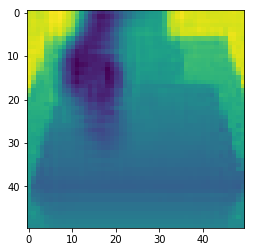

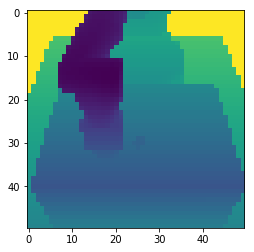

In [242]:
i = np.random.randint(0, len(s))
_ = a(s[i][None,:])
plt.imshow(_.numpy()[0][:,:,3])
plt.show()
plt.imshow(s[i][:,:,3])

In [13]:
c = model.ConvHybridNet(50, 4, 4, 4, [5,5,3,], [32,32, 64], [128, 32, 16], 0.001)

In [14]:
_ = c(np.random.randn(1,50,50, 4))
c.summary()

InternalError: Blas GEMM launch failed : a.shape=(1, 3136), b.shape=(3136, 4), m=1, n=4, k=3136 [Op:MatMul]

In [16]:
s

[0.4000000000000003,
 array([ 4.04999930e-01,  4.80000000e-01,  9.94402773e-08, -8.64969037e-06,
         1.81229827e-10,  6.00288106e-02,  9.95933222e-03, -8.28179489e-01,
        -3.60536711e-03,  1.44395047e+00,  2.98934300e-03,  9.55073323e-01,
         5.57696738e-03,  2.55108763e-06, -8.67902630e-08,  1.43820972e+00,
         7.80282624e-01,  4.24702091e-01,  1.00000000e+00, -4.41224843e-08,
         6.78807450e-08, -9.52242599e-16]),
 array([-2.54237879e-10, -2.25960720e-12,  6.96075052e-08, -2.06169028e-05,
        -3.28449304e-14,  7.22090908e-05,  7.02329211e-04,  1.68500947e-04,
        -1.36245845e-03, -3.86958851e-04,  1.12920681e-03,  2.16279647e-04,
        -9.51429180e-04,  1.29051726e-05,  4.90429596e-06, -4.83773193e-08,
        -3.14452576e-08,  1.17069414e-03,  1.25976791e-06, -1.93810448e-06,
        -2.89084431e-18]),
 None,
 {},
 0.4000000000000003,
 array([ 4.04999930e-01,  4.80000000e-01,  9.94402773e-08, -8.64969037e-06,
         1.81229827e-10,  6.00288106e-0

In [17]:
np.save("states.npy", np.array(ims))
np.save("actions.npy", np.array(a))

In [63]:
%%timeit
#with tf.device('/device:CPU:0'):
c.error(np.random.randn(5,50,50, 4))

ValueError: Incompatible type conversion requested to type 'float32' for variable of type 'float64'

In [65]:
c.train(np.array(ims), np.array(a), 4, 1, print_loss=True)

ValueError: Failed to convert numpy ndarray to a Tensor (Unable to get element as bytes.).

In [18]:
i = np.random.randint(0, len(s))
_ = c(s[i][None,:])
plt.imshow(_[1].numpy()[0][:,:,3])
plt.show()
plt.imshow(s[i][:,:,3])
print(_[0], a[i])

TypeError: 'float' object is not subscriptable

In [26]:
for l in c._layers:
    print(l)

ListWrapper([<tensorflow.python.keras.layers.core.Flatten object at 0x7f3f4d266ac8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f3f4d266d68>])
ListWrapper([<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f4d26e4a8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f4d26edd8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f4d27c7b8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f4d27ce48>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f4d9ed6d8>])


In [58]:
from envs import *

In [59]:
cenv = CameraRobot(env)

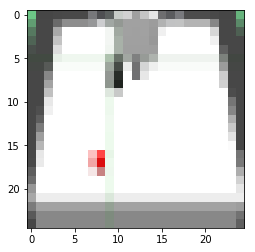

In [60]:
env.reset()
cenv = CameraRobot(env)
state = cenv.reset()
plt.imshow(state[1])
plt.show()

In [61]:
plt.imshow(im)

NameError: name 'im' is not defined

In [98]:
state[2].shape

(50, 50, 1)

In [99]:
state[0]["observation"][:3]

array([1.34194371, 0.74910047, 0.53471723])

In [101]:
state = cenv.reset()
s, a = man_controller.get_demo_cam2(cenv, state, norm = True)

1
1
1
1
1
1
1
1
1
1
10
1
1
1
1
1
1


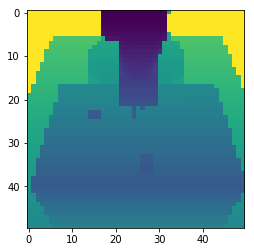

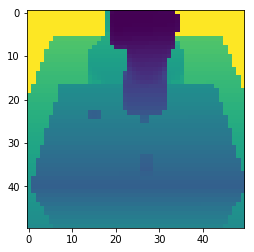

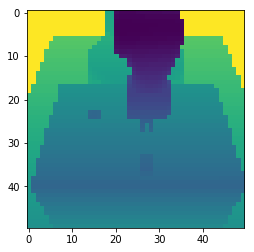

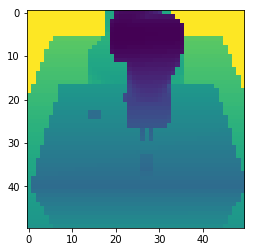

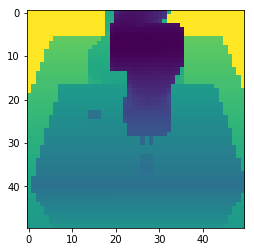

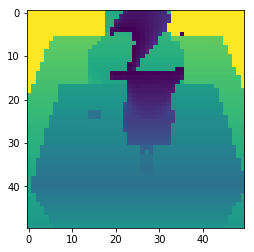

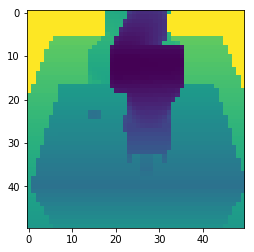

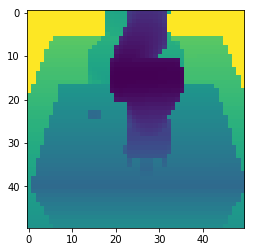

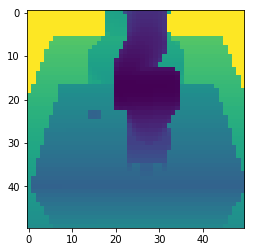

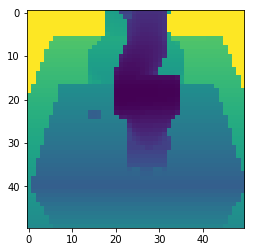

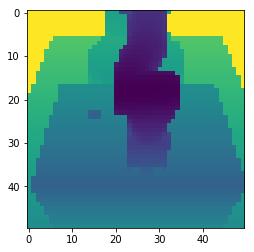

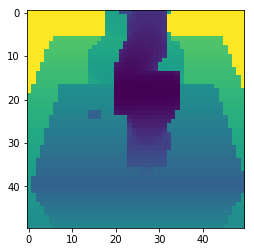

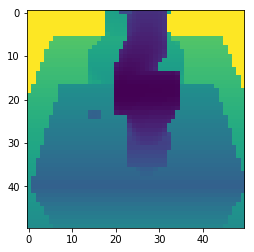

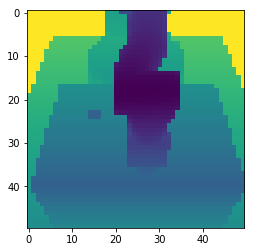

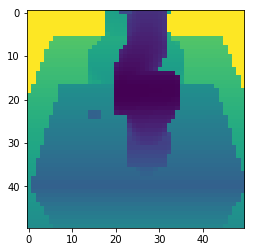

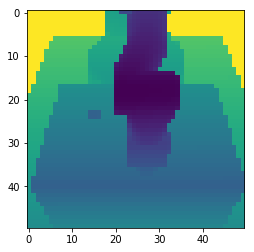

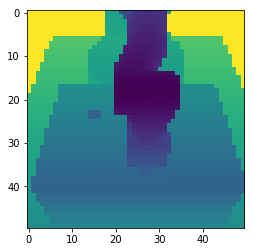

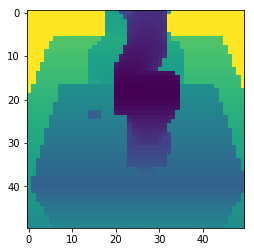

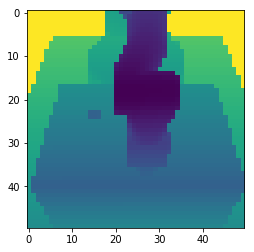

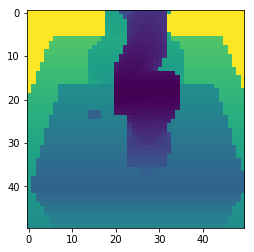

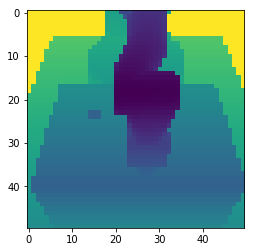

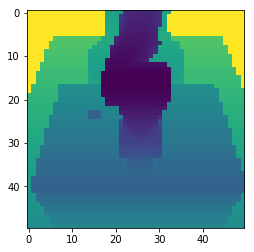

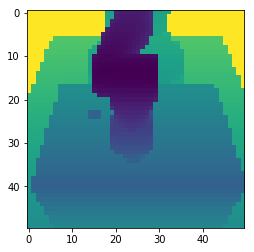

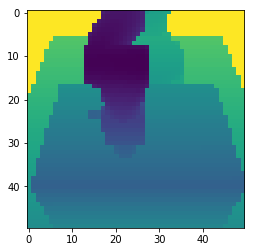

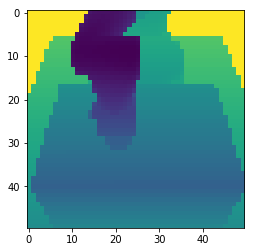

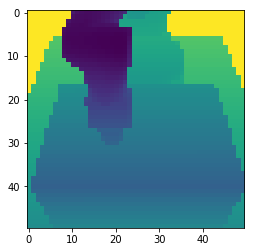

In [103]:
for ss in s:
    plt.imshow(ss[:,:,3])
    plt.show()